In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

In [105]:
from random import randint
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
import os

In [106]:
train_labels=[]
train_samples=[]

In [107]:
for i in range(50):
    random_younger=randint(13,64)
    train_samples.append([random_younger,random_younger])
    train_labels.append(1)
    
    random_older = randint(65,100)
    train_samples.append([random_older,random_older])
    train_labels.append(0)
    
for i in range(1000):
    random_younger=randint(13,64)
    train_samples.append([random_younger,random_younger])
    train_labels.append(0)
    
    random_older = randint(65,100)
    train_samples.append([random_older,random_older])
    train_labels.append(1)
    

In [108]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
#it is important to shuffle data
train_labels, train_samples = shuffle(train_labels, train_samples)
train_samples.shape

(2100, 2)

In [109]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,2))
scaled_train_samples.shape

(2100, 2)

In [110]:
scaled_train_samples

array([[0.66666667, 0.66666667],
       [0.22988506, 0.22988506],
       [0.98850575, 0.98850575],
       ...,
       [0.93103448, 0.93103448],
       [0.42528736, 0.42528736],
       [0.12643678, 0.12643678]])

In [111]:
train_labels

array([1, 0, 1, ..., 1, 0, 0])

In [142]:
## create model
model = Sequential([
    Dense(units=16 , input_shape=(1,2), activation='relu'),
    Dense(units=32 , activation='relu'),
    Dense(units=64 , activation='relu'),
    Dense(units=32 , activation='relu'),
    Dense(units=64 , activation='relu'),
    Dense(units=32 , activation='relu'),
    Dense(units=2 , activation='softmax')
])

In [143]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 1, 16)             48        
_________________________________________________________________
dense_31 (Dense)             (None, 1, 32)             544       
_________________________________________________________________
dense_32 (Dense)             (None, 1, 64)             2112      
_________________________________________________________________
dense_33 (Dense)             (None, 1, 32)             2080      
_________________________________________________________________
dense_34 (Dense)             (None, 1, 64)             2112      
_________________________________________________________________
dense_35 (Dense)             (None, 1, 32)             2080      
_________________________________________________________________
dense_36 (Dense)             (None, 1, 2)             

In [144]:
##compile model
model.compile(
    optimizer=Adam(learning_rate=0.0001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [145]:
##training model
model.fit(
    x=scaled_train_samples,
    y=train_labels,
    validation_split=0.1,
    batch_size=100,
    shuffle=True,
    epochs=100,
    verbose=2
)

Epoch 1/100
19/19 - 0s - loss: 0.6920 - accuracy: 0.4614 - val_loss: 0.6904 - val_accuracy: 0.4905
Epoch 2/100
19/19 - 0s - loss: 0.6832 - accuracy: 0.6042 - val_loss: 0.6836 - val_accuracy: 0.5667
Epoch 3/100
19/19 - 0s - loss: 0.6720 - accuracy: 0.6550 - val_loss: 0.6743 - val_accuracy: 0.5952
Epoch 4/100
19/19 - 0s - loss: 0.6590 - accuracy: 0.7026 - val_loss: 0.6635 - val_accuracy: 0.6238
Epoch 5/100
19/19 - 0s - loss: 0.6440 - accuracy: 0.7259 - val_loss: 0.6500 - val_accuracy: 0.6762
Epoch 6/100
19/19 - 0s - loss: 0.6256 - accuracy: 0.7550 - val_loss: 0.6328 - val_accuracy: 0.7190
Epoch 7/100
19/19 - 0s - loss: 0.6031 - accuracy: 0.7852 - val_loss: 0.6109 - val_accuracy: 0.7476
Epoch 8/100
19/19 - 0s - loss: 0.5751 - accuracy: 0.8148 - val_loss: 0.5843 - val_accuracy: 0.7619
Epoch 9/100
19/19 - 0s - loss: 0.5439 - accuracy: 0.8296 - val_loss: 0.5544 - val_accuracy: 0.8143
Epoch 10/100
19/19 - 0s - loss: 0.5095 - accuracy: 0.8476 - val_loss: 0.5231 - val_accuracy: 0.8143
Epoch 11/

Epoch 77/100
19/19 - 0s - loss: 0.2123 - accuracy: 0.9524 - val_loss: 0.2566 - val_accuracy: 0.9333
Epoch 78/100
19/19 - 0s - loss: 0.2120 - accuracy: 0.9460 - val_loss: 0.2564 - val_accuracy: 0.9429
Epoch 79/100
19/19 - 0s - loss: 0.2115 - accuracy: 0.9508 - val_loss: 0.2568 - val_accuracy: 0.9429
Epoch 80/100
19/19 - 0s - loss: 0.2116 - accuracy: 0.9524 - val_loss: 0.2559 - val_accuracy: 0.9429
Epoch 81/100
19/19 - 0s - loss: 0.2112 - accuracy: 0.9534 - val_loss: 0.2558 - val_accuracy: 0.9429
Epoch 82/100
19/19 - 0s - loss: 0.2111 - accuracy: 0.9492 - val_loss: 0.2561 - val_accuracy: 0.9429
Epoch 83/100
19/19 - 0s - loss: 0.2112 - accuracy: 0.9534 - val_loss: 0.2552 - val_accuracy: 0.9333
Epoch 84/100
19/19 - 0s - loss: 0.2116 - accuracy: 0.9513 - val_loss: 0.2554 - val_accuracy: 0.9333
Epoch 85/100
19/19 - 0s - loss: 0.2111 - accuracy: 0.9487 - val_loss: 0.2552 - val_accuracy: 0.9429
Epoch 86/100
19/19 - 0s - loss: 0.2106 - accuracy: 0.9471 - val_loss: 0.2550 - val_accuracy: 0.9429


In [146]:
test_labels=[]
test_samples=[]

In [147]:
for i in range(50):
    random_younger=randint(13,64)
    test_samples.append([random_younger,random_younger])
    test_labels.append(1)
    
    random_older = randint(65,100)
    test_samples.append([random_older,random_older])
    test_labels.append(0)
    
for i in range(1000):
    random_younger=randint(13,64)
    test_samples.append([random_younger,random_younger])
    test_labels.append(0)
    
    random_older = randint(65,100)
    test_samples.append([random_older,random_older])
    test_labels.append(1)

In [148]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
#it is important to shuffle data
test_labels, test_samples = shuffle(test_labels, test_samples)

In [149]:
scaled_test_samples = scaler.transform(test_samples.reshape(-1,2))
scaled_test_samples.shape

(2100, 2)

In [151]:
prediction = model.predict(x=scaled_test_samples, batch_size=80)

In [127]:
for i in prediction:
    print(i)

[0.2695903  0.73040974]
[0.9587536  0.04124634]
[0.937743   0.06225707]
[0.97416806 0.02583194]
[0.02244636 0.97755367]
[0.07391672 0.9260833 ]
[0.03699629 0.96300375]
[0.06139842 0.93860155]
[0.79046816 0.20953178]
[0.937743   0.06225707]
[0.9437488  0.05625128]
[0.04609289 0.95390713]
[0.02122521 0.9787748 ]
[0.92384195 0.076158  ]
[0.9735178  0.02648217]
[0.85918146 0.14081848]
[0.97285163 0.0271483 ]
[0.04361839 0.9563816 ]
[0.02373606 0.9762639 ]
[0.9759578  0.02404219]
[0.8970496  0.10295036]
[0.9748027  0.02519727]
[0.0189748  0.98102516]
[0.3304555  0.66954446]
[0.9678445  0.03215548]
[0.97285163 0.0271483 ]
[0.93450755 0.06549241]
[0.9749186  0.02508143]
[0.9766169 0.0233831]
[0.79046816 0.20953178]
[0.17109932 0.82890075]
[0.07391673 0.9260833 ]
[0.61210763 0.38789243]
[0.0694391 0.9305609]
[0.85918146 0.14081848]
[0.9771547  0.02284537]
[0.10422279 0.8957772 ]
[0.0694391 0.9305609]
[0.9748027  0.02519727]
[0.9678445  0.03215548]
[0.05791546 0.94208455]
[0.9759578  0.02404219

[0.21631387 0.78368616]
[0.97602683 0.0239732 ]
[0.9727145  0.02728554]
[0.9749186  0.02508143]
[0.02965593 0.97034407]
[0.5413067  0.45869336]
[0.97602683 0.0239732 ]
[0.06530375 0.93469626]
[0.02122521 0.9787748 ]
[0.07391672 0.9260833 ]
[0.5413067  0.45869336]
[0.92384195 0.076158  ]
[0.02244636 0.97755367]
[0.97285163 0.0271483 ]
[0.03313034 0.9668697 ]
[0.02244636 0.97755367]
[0.9771928  0.02280718]
[0.26959035 0.7304096 ]
[0.9489316  0.05106843]
[0.02122521 0.9787748 ]
[0.054717   0.94528306]
[0.03313034 0.9668697 ]
[0.02006914 0.9799309 ]
[0.9664768  0.03352321]
[0.79046816 0.20953178]
[0.9727145  0.02728554]
[0.9437488  0.05625128]
[0.02006914 0.9799309 ]
[0.6784718  0.32152817]
[0.96042365 0.03957641]
[0.9664768  0.03352321]
[0.21631387 0.78368616]
[0.0694391 0.9305609]
[0.9489316  0.05106842]
[0.96202856 0.03797141]
[0.07391672 0.9260833 ]
[0.02373606 0.9762639 ]
[0.96357095 0.03642903]
[0.46879753 0.53120244]
[0.02509797 0.97490203]
[0.01704418 0.9829558 ]
[0.9749186  0.0250

In [152]:
rounded_prediction = np.argmax(prediction,axis=-1)

In [102]:
for i in rounded_prediction:
    print(i)

0
1
1
0
1
1
1
1
1
0
1
1
0
1
0
1
0
1
0
1
0
1
0
0
1
1
1
1
0
0
1
0
0
0
1
1
0
0
1
0
0
0
1
0
1
1
1
0
1
1
0
0
0
0
0
0
1
1
1
1
0
0
1
0
0
0
1
0
0
0
1
1
0
1
1
0
0
0
0
0
1
1
1
0
0
0
1
1
1
1
0
0
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
1
1
0
0
0
1
0
1
1
1
0
0
0
0
1
0
1
1
1
0
0
0
1
0
1
1
0
1
0
0
0
0
1
1
0
1
0
1
1
0
0
0
0
1
0
1
1
0
0
0
1
1
1
1
1
1
0
0
0
1
0
1
0
1
1
0
1
0
1
0
0
0
0
1
1
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
0
0
1
0
0
1
0
0
0
1
1
1
1
0
0
1
0
0
1
0
1
1
1
0
0
1
1
0
1
1
1
0
0
0
1
0
1
1
1
1
1
1
0
0
1
0
0
0
1
0
0
0
1
0
0
0
0
0
1
1
0
1
0
1
1
0
1
1
1
1
1
1
1
1
0
0
0
1
1
0
1
0
1
0
0
0
1
1
0
1
1
1
0
0
0
1
0
0
1
0
0
1
1
0
0
0
1
0
1
0
0
1
1
0
1
1
0
1
1
0
0
1
0
1
0
0
0
1
1
0
0
1
1
0
0
0
1
0
1
1
1
1
1
0
1
0
0
0
0
0
1
0
0
0
0
1
1
1
1
1
1
1
0
0
1
1
1
1
0
1
0
0
1
1
1
0
1
0
0
0
0
0
0
0
0
1
0
1
1
1
1
1
1
1
1
1
1
1
0
0
1
1
0
1
0
0
0
0
1
1
1
1
0
1
0
0
1
0
1
0
1
1
0
0
1
0
0
0
0
1
1
1
1
1
1
1
0
1
1
0
0
1
1
0
0
0
1
0
1
0
0
1
1
1
1
0
0
0
0
0
1
0
1
1
0
0
1
1
0
0
0
0
0
1
1
0
0
0
1
1
0
1
0
1
1
0
0
1
0
1
0
1
0
0
1
1
1
1
1
1
0
0
1


In [88]:
def plot_confusion_matrix(
    cm, classes, normalize=False, title='confusion_matrix',
    cmap=plt.cm.Blues
):
    plt.imshow(cm, interpolation='nearest',cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
        print('Normalize confusion matrix')
    else:
        print('Confusion matrix without normalization')
        
    print(cm)
    
    thresh = cm.max()/2.
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,cm[i,j],
                 horizontalalignment = 'center',
                 color='white' if cm[i,j]> thresh else 'black'
                )
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix without normalization
[[ 983   67]
 [  48 1002]]


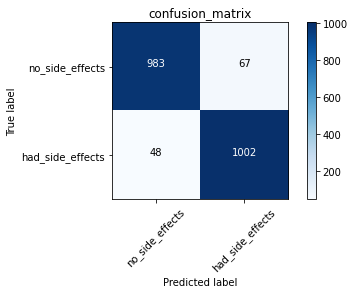

In [153]:
cm = confusion_matrix(y_true=test_labels,y_pred=rounded_prediction)
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)


In [39]:
## save and load model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [41]:
if os.path.isfile('./model/medical_trial_model.h5') is False:
    model.save('./model/medical_trial_model.h5')


In [43]:
new_model = load_model('./model/medical_trial_model.h5')

In [44]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [49]:
new_model.get_weights()

[array([[-0.45584366, -0.21934825,  0.2315468 ,  0.34395364, -0.17008519,
         -0.38954526,  0.6113478 ,  0.47262102,  0.39920393,  0.3078964 ,
          0.39605516, -0.39930537, -0.477897  ,  0.57269317,  0.7188652 ,
         -0.05908263]], dtype=float32),
 array([ 0.        ,  0.        , -0.10724943, -0.15946051,  0.21543197,
         0.        , -0.07105746, -0.1596674 ,  0.1779984 , -0.1423659 ,
        -0.15488419,  0.        ,  0.        , -0.17798713, -0.15717487,
         0.        ], dtype=float32),
 array([[-6.29088879e-02, -1.70813084e-01,  3.43380898e-01,
          2.82206267e-01,  9.38821733e-02,  2.49406397e-02,
         -1.32747144e-01, -5.25388420e-02,  1.89995795e-01,
          3.13447028e-01,  2.23413706e-02, -5.80060184e-02,
         -2.45702207e-01, -2.29286939e-01, -3.18019986e-02,
         -7.11255968e-02, -3.01316381e-03, -3.15736443e-01,
         -4.07493114e-03,  3.20310086e-01,  1.67294055e-01,
          6.32876158e-02, -3.07372063e-01,  7.18351603e-02,
 

In [50]:
new_model.optimizer

In [51]:
## save to json
json_string = model.to_json()

In [52]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [54]:
model_architecture = model_from_json(json_string)

In [57]:
model_architecture.get_weights()

[array([[ 0.45440745,  0.33649194, -0.36315173, -0.1737406 , -0.4108557 ,
          0.29363298, -0.5753039 , -0.16803059,  0.24693537,  0.01362365,
         -0.22776318, -0.12390637,  0.01236731, -0.10885793,  0.10611928,
         -0.04975748]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       dtype=float32),
 array([[ 2.50395507e-01, -2.30661035e-03,  1.83789521e-01,
         -2.93950588e-01, -3.36131066e-01,  1.69420242e-02,
          4.00224924e-02, -2.65187293e-01,  8.39695930e-02,
          2.59314984e-01, -2.56069928e-01, -7.64358044e-03,
         -3.51215422e-01, -1.76755875e-01, -2.86749274e-01,
          2.50695378e-01, -6.99259341e-02,  3.51152927e-01,
          3.48952740e-01, -3.15697014e-01,  3.06824774e-01,
          2.02128381e-01,  1.31289870e-01, -2.23387733e-01,
          1.59852356e-01, -2.07140043e-01,  1.68138117e-01,
         -2.60760009e-01, -1.64152443e-01,  2.49291331e-01,
          1.40466332e-01,  1.42742276e-01]

In [58]:
## save model weight

In [59]:
if os.path.isfile('./model/my_model_weights.h5') is False:
    model.save_weights('./model/my_model_weights.h5')


In [60]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax'),
])

In [61]:
model2.load_weights('./model/my_model_weights.h5')

In [62]:
model2.get_weights()

[array([[-0.45584366, -0.21934825,  0.2315468 ,  0.34395364, -0.17008519,
         -0.38954526,  0.6113478 ,  0.47262102,  0.39920393,  0.3078964 ,
          0.39605516, -0.39930537, -0.477897  ,  0.57269317,  0.7188652 ,
         -0.05908263]], dtype=float32),
 array([ 0.        ,  0.        , -0.10724943, -0.15946051,  0.21543197,
         0.        , -0.07105746, -0.1596674 ,  0.1779984 , -0.1423659 ,
        -0.15488419,  0.        ,  0.        , -0.17798713, -0.15717487,
         0.        ], dtype=float32),
 array([[-6.29088879e-02, -1.70813084e-01,  3.43380898e-01,
          2.82206267e-01,  9.38821733e-02,  2.49406397e-02,
         -1.32747144e-01, -5.25388420e-02,  1.89995795e-01,
          3.13447028e-01,  2.23413706e-02, -5.80060184e-02,
         -2.45702207e-01, -2.29286939e-01, -3.18019986e-02,
         -7.11255968e-02, -3.01316381e-03, -3.15736443e-01,
         -4.07493114e-03,  3.20310086e-01,  1.67294055e-01,
          6.32876158e-02, -3.07372063e-01,  7.18351603e-02,
 